In [ ]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show_img(title, img_bgr_or_gray):
    if img_bgr_or_gray is None:
        return
    if img_bgr_or_gray.ndim == 2:
        plt.imshow(img_bgr_or_gray, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img_bgr_or_gray, cv2.COLOR_BGR2RGB))
    plt.title(title); plt.axis('off'); plt.show()

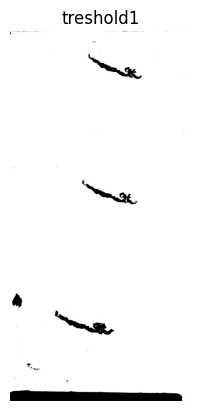

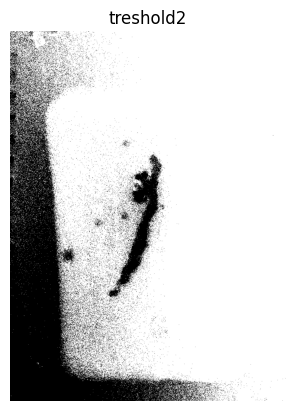

136
24592
area_c1=  17647.0


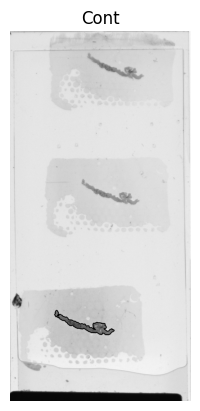

area_c2=  24858.5


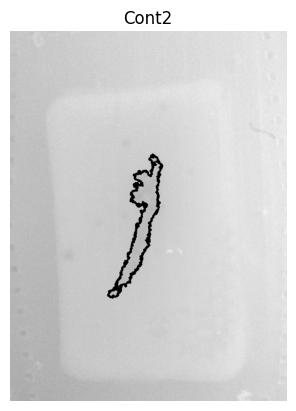

Similarità -> I1=7.626510 | I2=2.766573 | I3=0.692901
area_c1=  12483.5


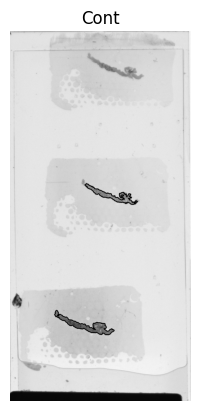

area_c2=  24858.5


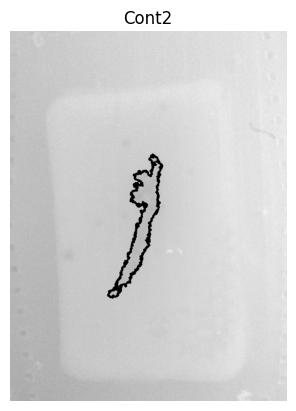

Similarità -> I1=14.576170 | I2=1.029888 | I3=1.517236
area_c1=  13215.5


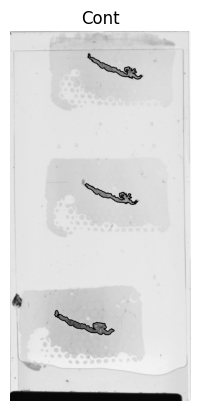

area_c2=  24858.5


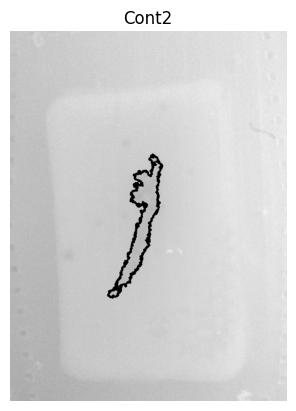

Similarità -> I1=26.297348 | I2=2.211522 | I3=2.764386


In [ ]:

img1 = cv2.imread('macro_vetrine15.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('tissue_block15.jpg', cv2.IMREAD_GRAYSCALE)

_, thresh1 = cv2.threshold(img1, 155, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img2, 135, 255, cv2.THRESH_BINARY)

show_img('treshold1', thresh1)
show_img('treshold2', thresh2)

contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

h1, w1 = thresh1.shape
h2, w2 = thresh2.shape

best_score = 100
best_c1 = None
best_c2 = None
w1, h1 = img1.shape
w2, h2 = img2.shape

print(len(contours1))
print(len(contours2))

for c1 in contours1:
    epsilon1 = 0.02 * cv2.arcLength(c1, True)
    approx1 = cv2.approxPolyDP(c1, epsilon1, True)
    if cv2.contourArea(c1) <= 5000 or cv2.contourArea(c1) > (w1 * h1 * 0.70):
        continue
    print('area_c1= ', cv2.contourArea(c1))
    cv2.drawContours(img1, [c1], 0, (0), 5)
    show_img('Cont', img1)

    for c2 in contours2:
        epsilon2 = 0.02 * cv2.arcLength(c2, True)
        approx2 = cv2.approxPolyDP(c2, epsilon2, True)

        if cv2.contourArea(c2) <= 5000 or cv2.contourArea(c2) > (w2 * h2 * 0.70):
            continue
        print('area_c2= ', cv2.contourArea(c2))
        cv2.drawContours(img2, [c2], 0, (0), 5)
        show_img('Cont2', img2)

        I1 = cv2.matchShapes(c1, c2, cv2.CONTOURS_MATCH_I1, 0)
        I2 = cv2.matchShapes(c1, c2, cv2.CONTOURS_MATCH_I2, 0)
        I3 = cv2.matchShapes(c1, c2, cv2.CONTOURS_MATCH_I3, 0)

        print(f"Similarità -> I1={I1:.6f} | I2={I2:.6f} | I3={I3:.6f}")
